# Import libraries

In [34]:
import jalali_pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pytse_client as tse
from pytse_client.download import download_financial_indexes

#import plotly.express as px
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#from plotly.offline import init_notebook_mode

import seaborn as sns

from sklearn.model_selection import train_test_split

import ta

from zigzag import peak_valley_pivots

# Import data

In [35]:
marketIndex = download_financial_indexes(symbols = 'شاخص كل', write_to_csv = True, include_jdate = True)
marketIndex = marketIndex['شاخص كل']
marketIndex.rename(columns = {'value': 'TEDPIX'}, inplace = True)
print(f'Shape of TEDPIX: {marketIndex.shape}')
marketIndex.head()

Shape of TEDPIX: (3326, 3)


,jdate,TEDPIX,date
0,1387-09-14,9248.9,2008-12-04
1,1387-09-15,9248.9,2008-12-05
2,1387-09-16,9178.3,2008-12-06
3,1387-09-17,9130.5,2008-12-07
4,1387-09-18,9089.2,2008-12-08


In [36]:
#sipa = tse.download(symbols = ["خساپا"], write_to_csv = False, include_jdate = True)

tse.download(symbols = ['فولاد'], write_to_csv = True, include_jdate = True)
folad = tse.Ticker(symbol = 'فولاد',  adjust = True)
foladHist = folad.history
foladHist['pct_change'] = foladHist['adjClose'].pct_change() * 100
print(f'Shape of Folad price history: {foladHist.shape}')

foladHist.head()

Shape of Folad price history: (3415, 11)


,date,open,high,low,adjClose,value,volume,count,yesterday,close,pct_change
0,2007-03-11,16.0,16.0,16.0,16.0,889437216900,468077431,7736,16.0,16.0,NaN
1,2007-03-12,16.0,16.0,16.0,16.0,193879458000,100041000,9214,16.0,16.0,0.0
2,2007-03-13,16.0,16.0,16.0,16.0,249241504527,126270939,5862,16.0,16.0,0.0
3,2007-03-14,16.0,16.0,16.0,16.0,51666379451,26705128,1901,16.0,16.0,0.0
4,2007-03-17,16.0,16.0,16.0,16.0,28239006789,14877283,1514,16.0,16.0,0.0


In [37]:
foladHist_new = pd.concat(
    [
        foladHist,
        foladHist.shift(1).drop(columns = 'date').add_prefix('last_')
    ], 
    axis = 1
)
foladHist_new

,date,open,high,low,adjClose,value,volume,count,yesterday,close,...,last_open,last_high,last_low,last_adjClose,last_value,last_volume,last_count,last_yesterday,last_close,last_pct_change
0,2007-03-11,16.0,16.0,16.0,16.0,889437216900,468077431,7736,16.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-03-12,16.0,16.0,16.0,16.0,193879458000,100041000,9214,16.0,16.0,...,16.0,16.0,16.0,16.0,8.894372e+11,468077431.0,7736.0,16.0,16.0,NaN
2,2007-03-13,16.0,16.0,16.0,16.0,249241504527,126270939,5862,16.0,16.0,...,16.0,16.0,16.0,16.0,1.938795e+11,100041000.0,9214.0,16.0,16.0,0.000000
3,2007-03-14,16.0,16.0,16.0,16.0,51666379451,26705128,1901,16.0,16.0,...,16.0,16.0,16.0,16.0,2.492415e+11,126270939.0,5862.0,16.0,16.0,0.000000
4,2007-03-17,16.0,16.0,16.0,16.0,28239006789,14877283,1514,16.0,16.0,...,16.0,16.0,16.0,16.0,5.166638e+10,26705128.0,1901.0,16.0,16.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,2022-09-06,5080.0,5100.0,5020.0,5060.0,175608551800,34701518,3234,5080.0,5070.0,...,5150.0,5150.0,5050.0,5080.0,2.473837e+11,48675596.0,4011.0,5090.0,5060.0,-0.196464
3411,2022-09-07,5080.0,5090.0,5020.0,5060.0,215291219330,42583792,3401,5060.0,5040.0,...,5080.0,5100.0,5020.0,5060.0,1.756086e+11,34701518.0,3234.0,5080.0,5070.0,-0.393701
3412,2022-09-10,5050.0,5070.0,4990.0,5030.0,253873785990,50441468,3581,5060.0,5040.0,...,5080.0,5090.0,5020.0,5060.0,2.152912e+11,42583792.0,3401.0,5060.0,5040.0,0.000000
3413,2022-09-11,5040.0,5060.0,5020.0,5030.0,189855163190,37750629,3062,5030.0,5030.0,...,5050.0,5070.0,4990.0,5030.0,2.538738e+11,50441468.0,3581.0,5060.0,5040.0,-0.592885


In [38]:
foladClient = folad.client_types
print(f"Shape of Folad's client history: {foladClient.shape}")
foladClient.to_csv('foladClient.csv')
foladClient.head()

Shape of Folad's client history: (3028, 18)


,date,individual_buy_count,corporate_buy_count,individual_sell_count,corporate_sell_count,individual_buy_vol,corporate_buy_vol,individual_sell_vol,corporate_sell_vol,individual_buy_value,corporate_buy_value,individual_sell_value,corporate_sell_value,individual_buy_mean_price,individual_sell_mean_price,corporate_buy_mean_price,corporate_sell_mean_price,individual_ownership_change
0,20220911,1371,7,867,13,27460629,10290000,20446098,17304531,138161463190,51693700000,102801001160,87054162030,5031.256319,5027.903180,5023.683188,5030.714905,7014531.0
1,20220910,1456,8,1076,13,29062906,21378562,27200089,23241379,146260987130,107612798860,137059128840,116814657150,5032.565812,5038.922073,5033.678077,5026.150004,1862817.0
2,20220907,1449,6,857,14,32216792,10367000,18179929,24403863,162903228610,52387990720,91866598120,123424621210,5056.469577,5053.187948,5053.341441,5057.585400,14036863.0
3,20220906,1433,6,925,8,20280964,14420554,23545245,11156273,102617004540,72991547260,119115258980,56493292820,5059.769572,5058.994246,5061.632671,5063.814127,-3264281.0
4,20220905,2007,3,820,10,34964184,13711412,34007836,14667760,177799489620,69584230600,172832051400,74551668820,5085.189164,5082.124349,5074.913554,5082.689437,956348.0


# Indicators

In [39]:
from indicator_features import EMA
emaCols = EMA(foladHist)
emaCols

,EMA_5d,last_EMA_5d,EMA_40d,last_EMA_40d,EMA_buy,EMA_position
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,16.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3410,5102.696331,5124.044497,5289.302691,5301.061803,NaN,0.0
3411,5088.464221,5102.696331,5278.117194,5289.302691,NaN,0.0
3412,5068.976147,5088.464221,5266.013916,5278.117194,NaN,0.0
3413,5055.984098,5068.976147,5254.501042,5266.013916,NaN,0.0


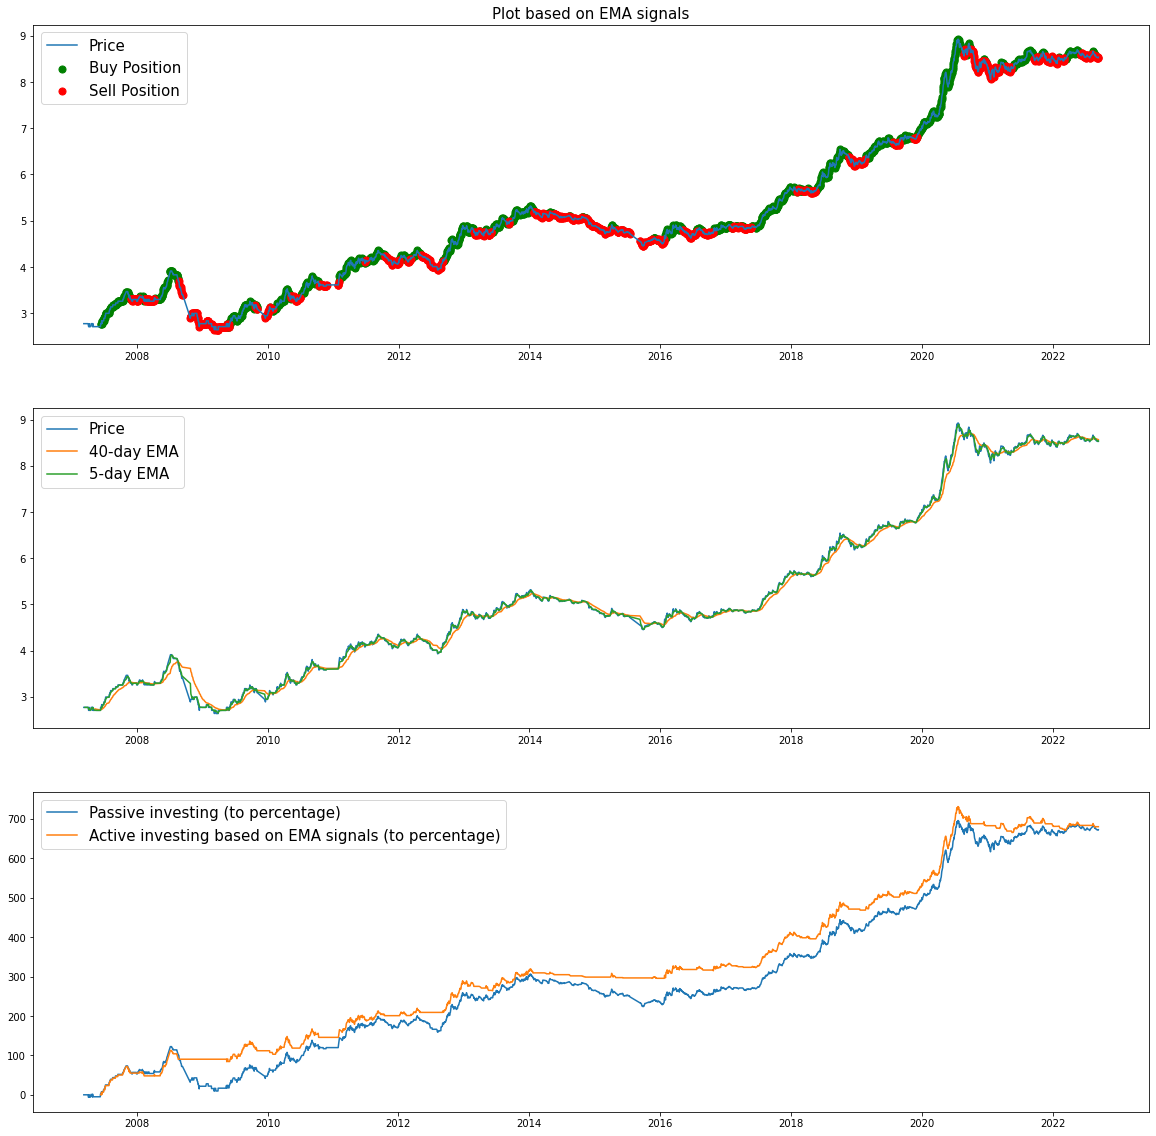

In [40]:
EMAzeroSig = emaCols['EMA_position'] == 0
EMAoneSig =  emaCols['EMA_position'] == 1

plt.figure(figsize = (20, 20))

plt.subplot(3, 1, 1)

plt.title('Plot based on EMA signals', fontsize = 15)
plt.plot(
    foladHist['date'], 
    np.log(foladHist['adjClose']),
    label = 'Price'
)
plt.scatter(
    foladHist['date'][EMAoneSig],
    np.log(foladHist['adjClose'][EMAoneSig]), 
    color = 'g',
    s = 50,
    label = 'Buy Position'
)
plt.scatter(
    foladHist['date'][EMAzeroSig],
    np.log(foladHist['adjClose'][EMAzeroSig]), 
    color = 'r',
    s = 50,
    label = 'Sell Position'
)
plt.legend(fontsize = 15)

plt.subplot(3, 1, 2)

plt.plot(
    foladHist['date'], 
    np.log(foladHist['adjClose']),
    label = 'Price'
)
plt.plot(
    foladHist['date'], 
    np.log(emaCols['EMA_40d']),
    label = '40-day EMA'
)
plt.plot(
    foladHist['date'], 
    np.log(emaCols['EMA_5d']),
    label = '5-day EMA'
)
plt.legend(fontsize = 15)

plt.subplot(3, 1, 3)

plt.plot(
    foladHist['date'], 
    foladHist['pct_change'].cumsum(),
    label = 'Passive investing (to percentage)'
)
plt.plot(
    foladHist['date'], 
    (foladHist['pct_change'] * emaCols['EMA_position']).cumsum(), 
    label = 'Active investing based on EMA signals (to percentage)'
)
plt.legend(fontsize = 15)

In [41]:
from indicator_features import MACD
macdCols = MACD(foladHist)
macdCols

,MACD,MACD_diff,MACD_signal,MACD_buy,MACD_position
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3410,-69.747283,-38.688593,-31.058689,NaN,0.0
3411,-74.936082,-35.101914,-39.834168,NaN,0.0
3412,-80.540570,-32.565122,-47.975448,NaN,0.0
3413,-84.013710,-28.830609,-55.183100,NaN,0.0


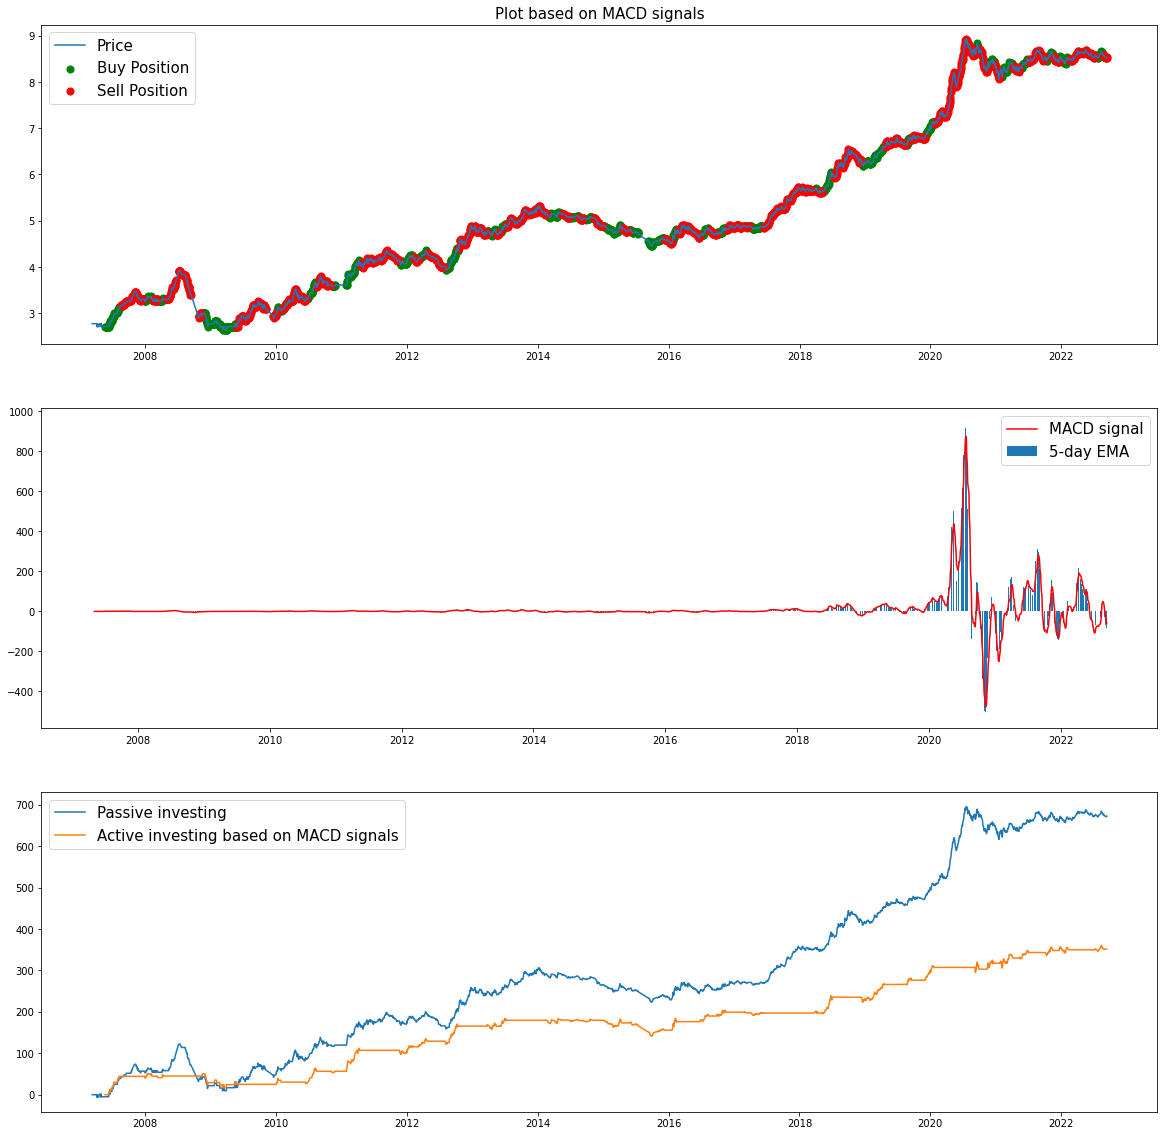

In [42]:
MACDzeroSig = macdCols['MACD_position'] == 0
MACDoneSig =  macdCols['MACD_position'] == 1

plt.figure(figsize = (20, 20))

plt.subplot(3, 1, 1)

plt.title('Plot based on MACD signals', fontsize = 15)
plt.plot(
    foladHist['date'], 
    np.log(foladHist['adjClose']),
    label = 'Price'
)
plt.scatter(
    foladHist['date'][MACDoneSig],
    np.log(foladHist['adjClose'][MACDoneSig]), 
    color = 'g',
    s = 50,
    label = 'Buy Position'
)
plt.scatter(
    foladHist['date'][MACDzeroSig],
    np.log(foladHist['adjClose'][MACDzeroSig]), 
    color = 'r',
    s = 50,
    label = 'Sell Position'
)
plt.legend(fontsize = 15)

plt.subplot(3, 1, 2)

plt.plot(
    foladHist['date'], 
    macdCols['MACD_signal'],
    label = 'MACD signal',
    color = 'red'
)

plt.bar(
    foladHist['date'], 
    macdCols['MACD'],
    label = '5-day EMA'
)
plt.legend(fontsize = 15)

plt.subplot(3, 1, 3)

plt.plot(
    foladHist['date'], 
    foladHist['pct_change'].cumsum(),
    label = 'Passive investing'
)
plt.plot(
    foladHist['date'], 
    (foladHist['pct_change'] * macdCols['MACD_position']).cumsum(), 
    label = 'Active investing based on MACD signals'
)
plt.legend(fontsize = 15)

In [43]:
from indicator_features import STOCHASTIC
stochasticCols = STOCHASTIC(foladHist)
stochasticCols

,STOCH_fast,STOCH_slow,last_STOCH_fast,last_STOCH_slow,STOCH_buy,STOCH_position
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3410,7.042254,5.636871,5.479452,4.228421,NaN,0.0
3411,3.174603,6.271792,7.042254,5.636871,NaN,0.0
3412,10.869565,6.999922,3.174603,6.271792,NaN,0.0
3413,9.302326,7.173640,10.869565,6.999922,NaN,0.0


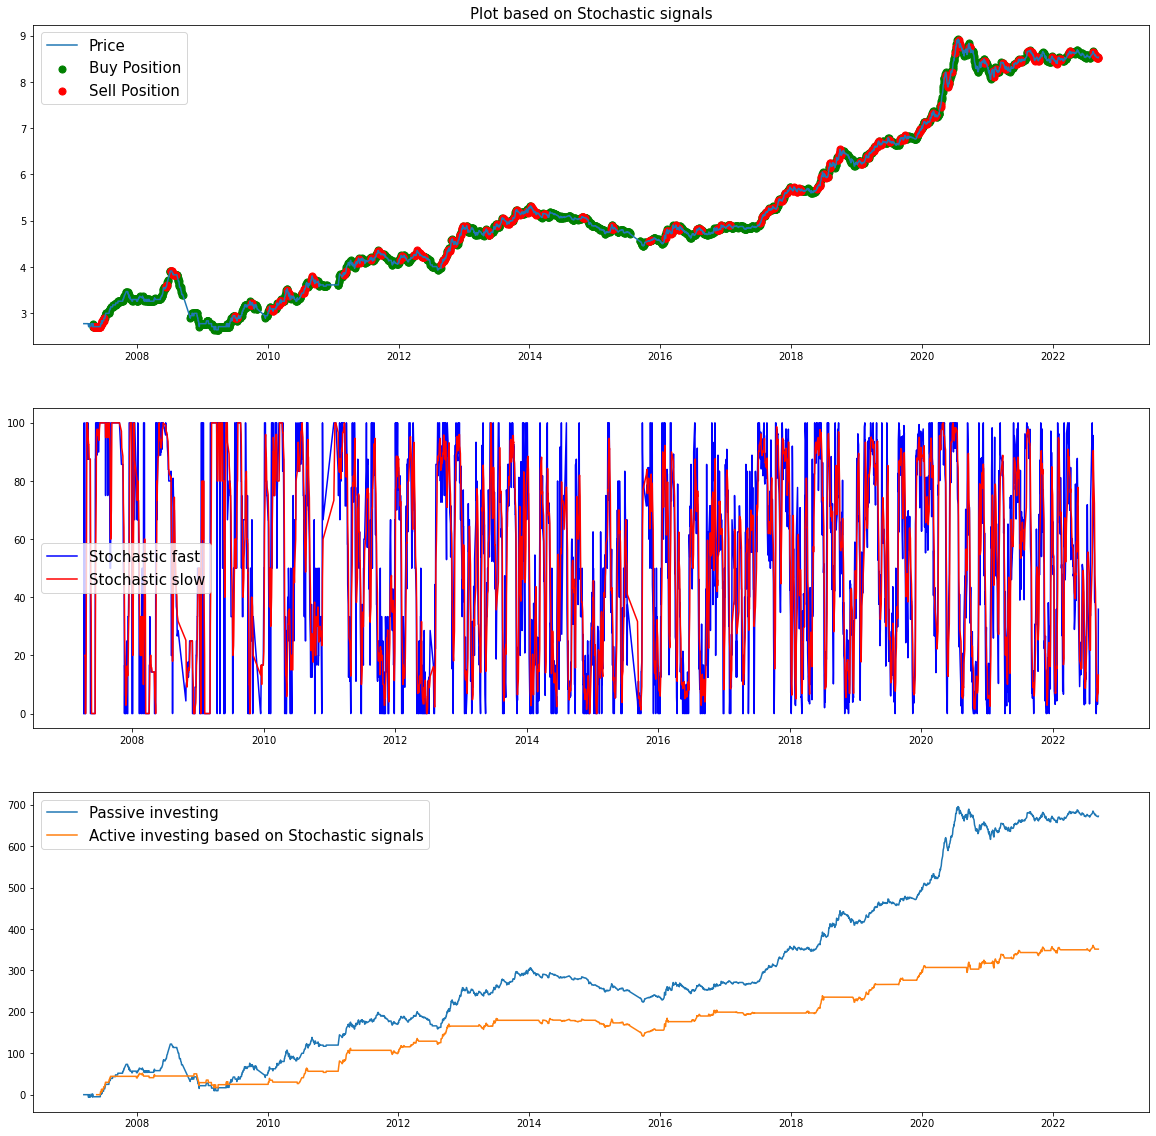

In [44]:
STOCHzeroSig = stochasticCols['STOCH_position'] == 0
STOCHoneSig =  stochasticCols['STOCH_position'] == 1

plt.figure(figsize = (20, 20))

plt.subplot(3, 1, 1)

plt.title('Plot based on Stochastic signals', fontsize = 15)
plt.plot(
    foladHist['date'], 
    np.log(foladHist['adjClose']),
    label = 'Price'
)
plt.scatter(
    foladHist['date'][STOCHoneSig],
    np.log(foladHist['adjClose'][STOCHoneSig]), 
    color = 'g',
    s = 50,
    label = 'Buy Position'
)
plt.scatter(
    foladHist['date'][STOCHzeroSig],
    np.log(foladHist['adjClose'][STOCHzeroSig]), 
    color = 'r',
    s = 50,
    label = 'Sell Position'
)
plt.legend(fontsize = 15)

plt.subplot(3, 1, 2)

plt.plot(
    foladHist['date'], 
    stochasticCols['STOCH_fast'],
    label = 'Stochastic fast',
    color = 'blue'
)

plt.plot(
    foladHist['date'], 
    stochasticCols['STOCH_slow'],
    label = 'Stochastic slow',
    color = 'red'
)
plt.legend(fontsize = 15)

plt.subplot(3, 1, 3)

plt.plot(
    foladHist['date'], 
    foladHist['pct_change'].cumsum(),
    label = 'Passive investing'
)
plt.plot(
    foladHist['date'], 
    (foladHist['pct_change'] * macdCols['MACD_position']).cumsum(), 
    label = 'Active investing based on Stochastic signals'
)
plt.legend(fontsize = 15)

In [45]:
from indicator_features import BB
bbCols = BB(foladHist_new)
bbCols

,BB_bbh,BB_bbl,last_BB_bbh,last_BB_bbl,BB_buy,BB_position
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3410,5800.855033,4911.144967,5792.480994,4937.519006,NaN,0.0
3411,5796.060866,4875.939134,5800.855033,4911.144967,NaN,0.0
3412,5781.830735,4841.169265,5796.060866,4875.939134,NaN,0.0
3413,5707.054269,4840.945731,5781.830735,4841.169265,NaN,0.0


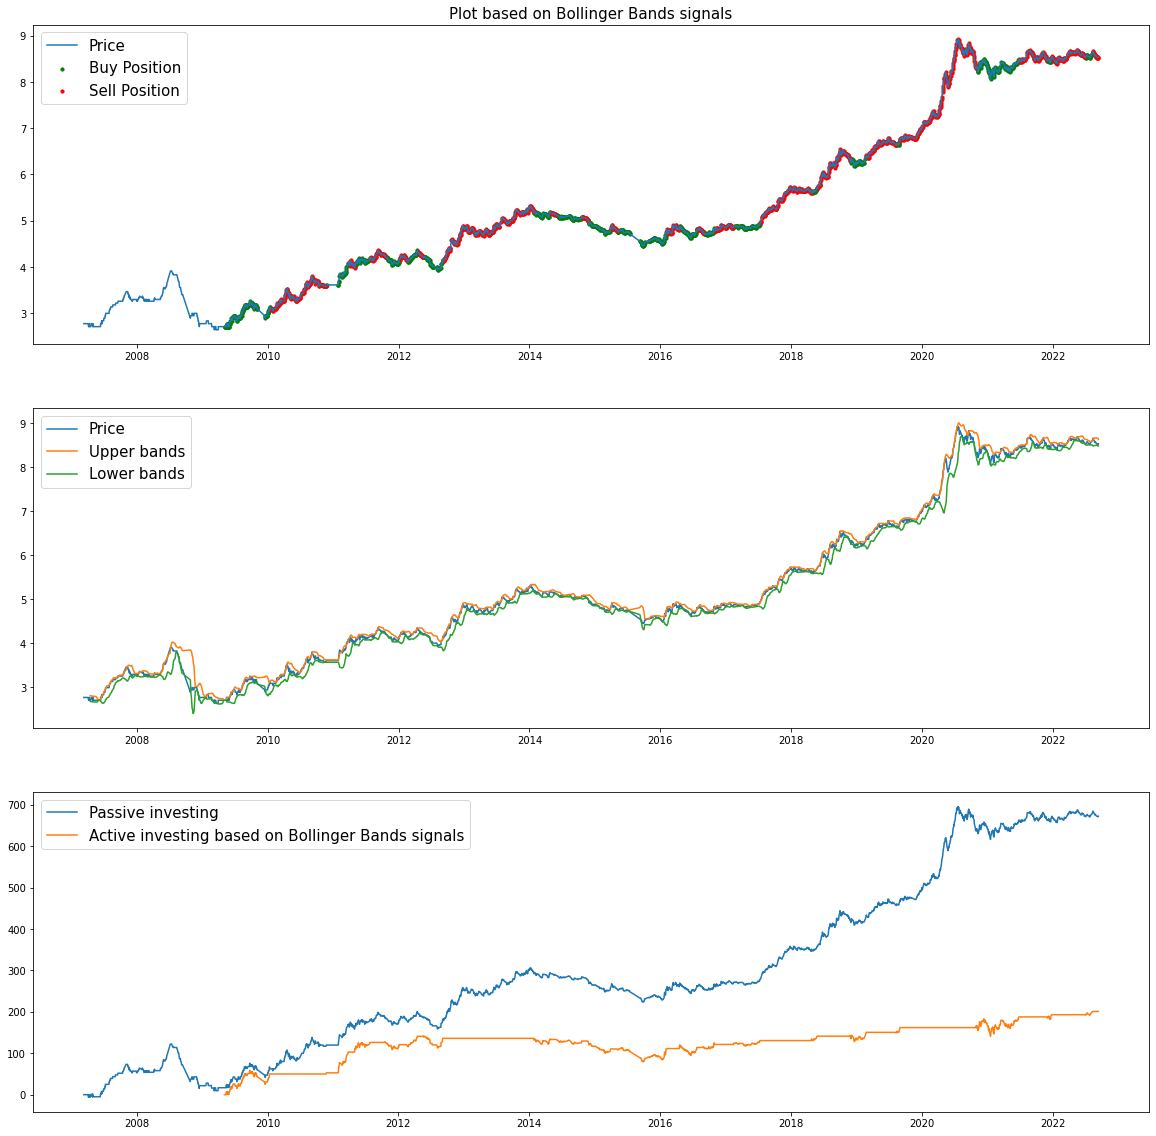

In [46]:
BBzeroSig = bbCols['BB_position'] == 0
BBoneSig =  bbCols['BB_position'] == 1

plt.figure(figsize = (20, 20))

plt.subplot(3, 1, 1)

plt.title('Plot based on Bollinger Bands signals', fontsize = 15)
plt.plot(
    foladHist['date'], 
    np.log(foladHist['adjClose']),
    label = 'Price'
)
plt.scatter(
    foladHist['date'][BBoneSig],
    np.log(foladHist['adjClose'][BBoneSig]), 
    color = 'g',
    s = 10,
    label = 'Buy Position'
)
plt.scatter(
    foladHist['date'][BBzeroSig],
    np.log(foladHist['adjClose'][BBzeroSig]), 
    color = 'r',
    s = 10,
    label = 'Sell Position'
)
plt.legend(fontsize = 15)

plt.subplot(3, 1, 2)

plt.plot(
    foladHist['date'], 
    np.log(foladHist['adjClose']),
    label = 'Price'
)
plt.plot(
    foladHist['date'], 
    np.log(bbCols['BB_bbh']),
    label = 'Upper bands'
)
plt.plot(
    foladHist['date'], 
    np.log(bbCols['BB_bbl']),
    label = 'Lower bands'
)

plt.legend(fontsize = 15)

plt.subplot(3, 1, 3)

plt.plot(
    foladHist['date'], 
    foladHist['pct_change'].cumsum(),
    label = 'Passive investing'
)
plt.plot(
    foladHist['date'], 
    (foladHist['pct_change'] * bbCols['BB_position']).cumsum(), 
    label = 'Active investing based on Bollinger Bands signals'
)
plt.legend(fontsize = 15)

In [47]:
from indicator_features import SMA
smaCols = SMA(foladHist)
smaCols

,SMA10d,SMA20d,last_SMA20d,SMA30d,SMA50d,last_SMA50d,SMA80d,SMA_buy,SMA_position
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3410,5179.0,5356.0,5365.0,5293.900000,5286.68,5293.00,5411.2750,NaN,1.0
3411,5152.0,5336.0,5356.0,5284.766667,5276.98,5286.68,5403.8625,NaN,1.0
3412,5122.0,5311.5,5336.0,5275.566667,5266.68,5276.98,5395.8375,NaN,1.0
3413,5098.0,5274.0,5311.5,5269.966667,5257.42,5266.68,5387.8750,NaN,1.0


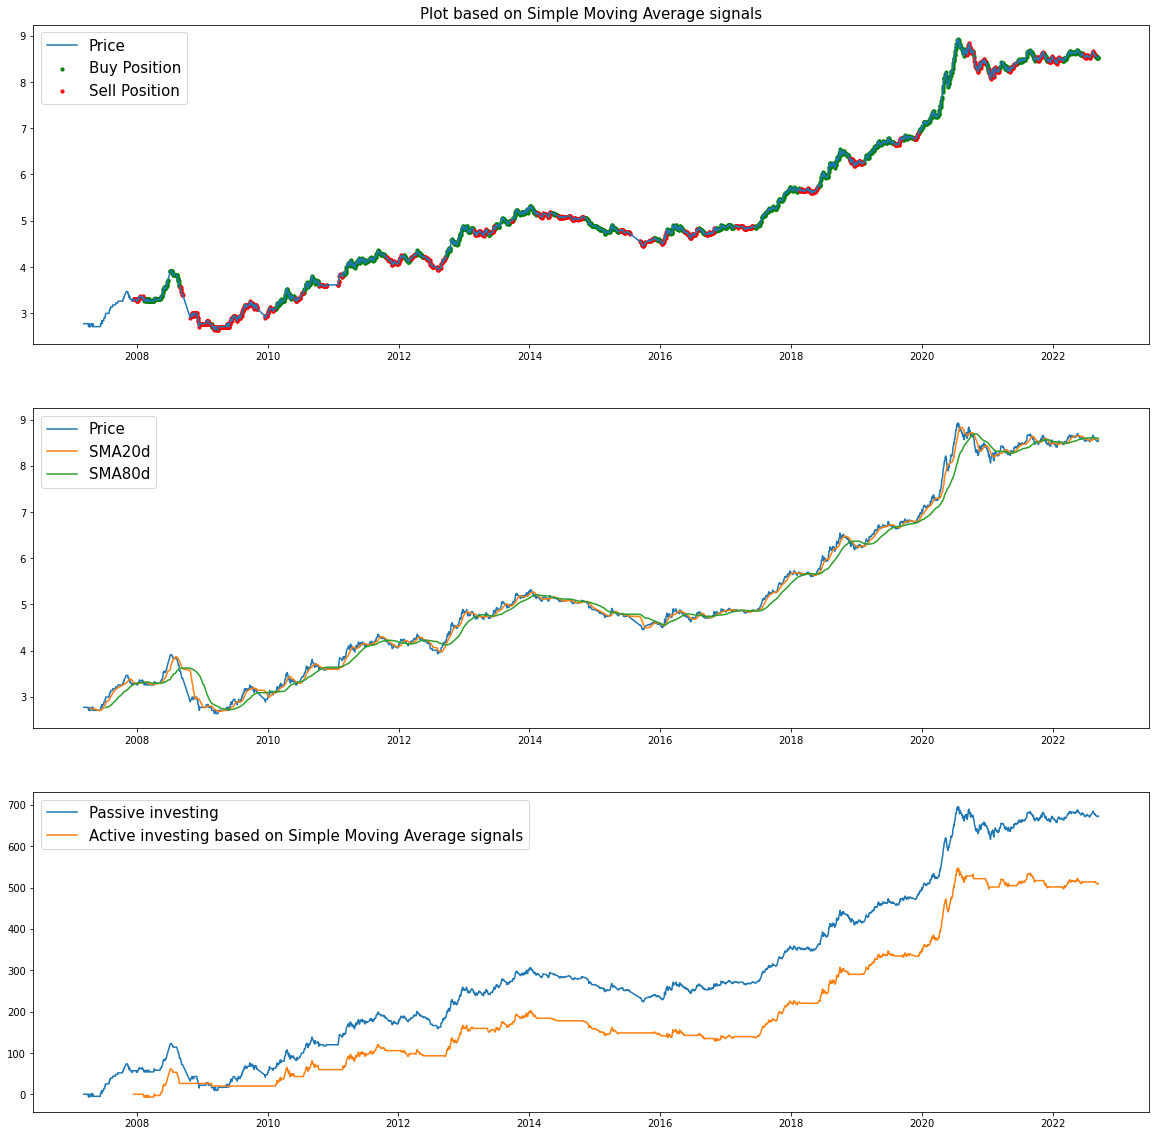

In [48]:
SMAzeroSig = smaCols['SMA_position'] == 0
SMAoneSig =  smaCols['SMA_position'] == 1

plt.figure(figsize = (20, 20))

plt.subplot(3, 1, 1)

plt.title('Plot based on Simple Moving Average signals', fontsize = 15)
plt.plot(
    foladHist['date'], 
    np.log(foladHist['adjClose']),
    label = 'Price'
)
plt.scatter(
    foladHist['date'][SMAoneSig],
    np.log(foladHist['adjClose'][SMAoneSig]), 
    color = 'g',
    s = 10,
    label = 'Buy Position'
)
plt.scatter(
    foladHist['date'][SMAzeroSig],
    np.log(foladHist['adjClose'][SMAzeroSig]), 
    color = 'r',
    s = 10,
    label = 'Sell Position'
)
plt.legend(fontsize = 15)

plt.subplot(3, 1, 2)

plt.plot(
    foladHist['date'], 
    np.log(foladHist['adjClose']),
    label = 'Price'
)
plt.plot(
    foladHist['date'], 
    np.log(smaCols['SMA20d']),
    label = 'SMA20d'
)
plt.plot(
    foladHist['date'], 
    np.log(smaCols['SMA80d']),
    label = 'SMA80d'
)

plt.legend(fontsize = 15)

plt.subplot(3, 1, 3)

plt.plot(
    foladHist['date'], 
    foladHist['pct_change'].cumsum(),
    label = 'Passive investing'
)
plt.plot(
    foladHist['date'], 
    (foladHist['pct_change'] * smaCols['SMA_position']).cumsum(), 
    label = 'Active investing based on Simple Moving Average signals'
)
plt.legend(fontsize = 15)

In [49]:
from indicator_features import RSI
rsiCols = RSI(foladHist)
rsiCols

,RSI,RSI_buy,RSI_position
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
3410,36.273885,NaN,0.0
3411,36.273885,NaN,0.0
3412,34.793150,NaN,0.0
3413,34.793150,NaN,0.0


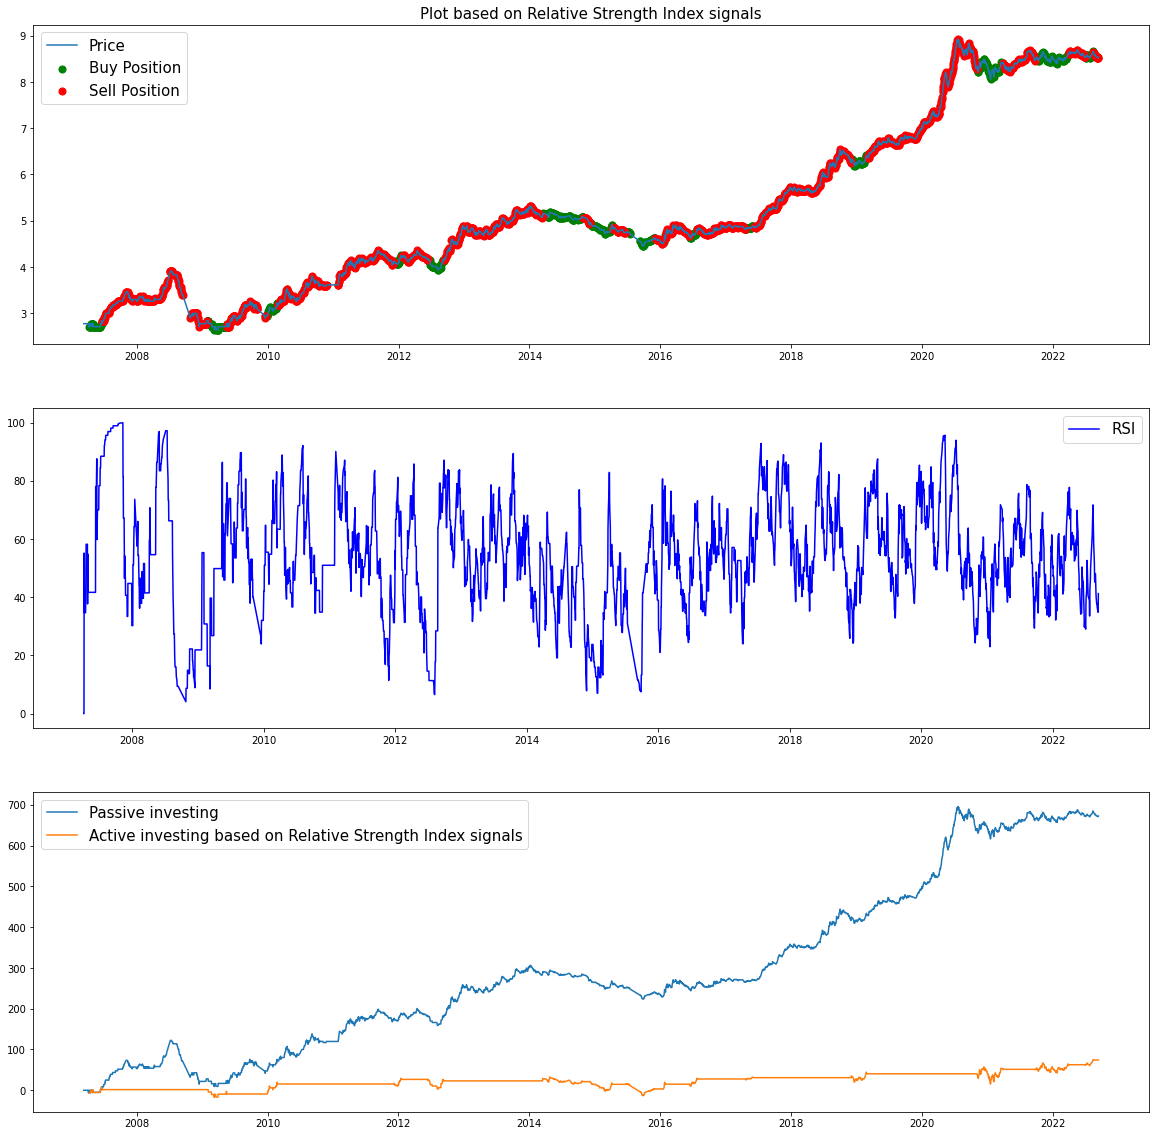

In [50]:
RSIzeroSig = rsiCols['RSI_position'] == 0
RSIoneSig =  rsiCols['RSI_position'] == 1

plt.figure(figsize = (20, 20))

plt.subplot(3, 1, 1)

plt.title('Plot based on Relative Strength Index signals', fontsize = 15)
plt.plot(
    foladHist['date'], 
    np.log(foladHist['adjClose']),
    label = 'Price'
)
plt.scatter(
    foladHist['date'][RSIoneSig],
    np.log(foladHist['adjClose'][RSIoneSig]), 
    color = 'g',
    s = 50,
    label = 'Buy Position'
)
plt.scatter(
    foladHist['date'][RSIzeroSig],
    np.log(foladHist['adjClose'][RSIzeroSig]), 
    color = 'r',
    s = 50,
    label = 'Sell Position'
)
plt.legend(fontsize = 15)

plt.subplot(3, 1, 2)

plt.plot(
    foladHist['date'], 
    rsiCols['RSI'],
    label = 'RSI',
    color = 'blue'
)

plt.legend(fontsize = 15)

plt.subplot(3, 1, 3)

plt.plot(
    foladHist['date'], 
    foladHist['pct_change'].cumsum(),
    label = 'Passive investing'
)
plt.plot(
    foladHist['date'], 
    (foladHist['pct_change'] * rsiCols['RSI_position']).cumsum(), 
    label = 'Active investing based on Relative Strength Index signals'
)
plt.legend(fontsize = 15)

# Concat

In [51]:
foladDf = pd.concat(
    [
        foladHist,
        emaCols,
        macdCols,
        bbCols,
        smaCols,
        rsiCols        
    ],
    axis = 1
) # 3412 rows × 53 columns

foladDf.dropna(
    axis = 'columns', 
    thresh = len(foladDf) - 81,
    inplace = True
) # 3412 rows × 43 columns

foladDf.dropna(
    axis = 'index', 
    how = 'any',
    inplace = True
) # 3333 rows × 40 columns

foladDf.head()

,date,open,high,low,adjClose,value,volume,count,yesterday,close,...,last_BB_bbl,SMA10d,SMA20d,last_SMA20d,SMA30d,SMA50d,last_SMA50d,SMA80d,RSI,RSI_position
79,2007-07-11,20.0,20.0,20.0,20.0,32801833890,13701685,701,19.0,20.0,...,15.070551,18.4,17.50,17.25,16.666667,16.04,15.94,15.90,88.416757,0.0
80,2007-07-14,20.0,20.0,20.0,20.0,101037157516,41484855,2611,20.0,20.0,...,15.263932,18.7,17.70,17.50,16.833333,16.12,16.04,15.95,88.416757,0.0
81,2007-07-15,20.0,20.0,20.0,20.0,2249683461,942473,121,20.0,20.0,...,15.325132,18.9,17.90,17.70,17.000000,16.20,16.12,16.00,88.416757,0.0
82,2007-07-16,20.0,20.0,20.0,20.0,55551799076,23338850,1586,20.0,20.0,...,15.458689,19.1,18.10,17.90,17.166667,16.30,16.20,16.05,88.416757,0.0
83,2007-07-17,20.0,20.0,19.0,20.0,41409372184,17354847,1497,20.0,20.0,...,15.658689,19.3,18.25,18.10,17.333333,16.40,16.30,16.10,88.416757,0.0


In [52]:
pivots = pd.DataFrame(
    peak_valley_pivots(

        foladHist['adjClose'], 
        0.08, 
        -0.08
    ) * -1,
    columns = ['label']
)

signals = pivots.replace(to_replace = 0, value = np.nan)
signals.fillna(method = 'ffill', inplace = True)
signals.replace(to_replace = -1, value = 0,  inplace = True)

np.unique(signals, return_counts = True)

(array([0., 1.]), array([1489, 1926], dtype=int64))

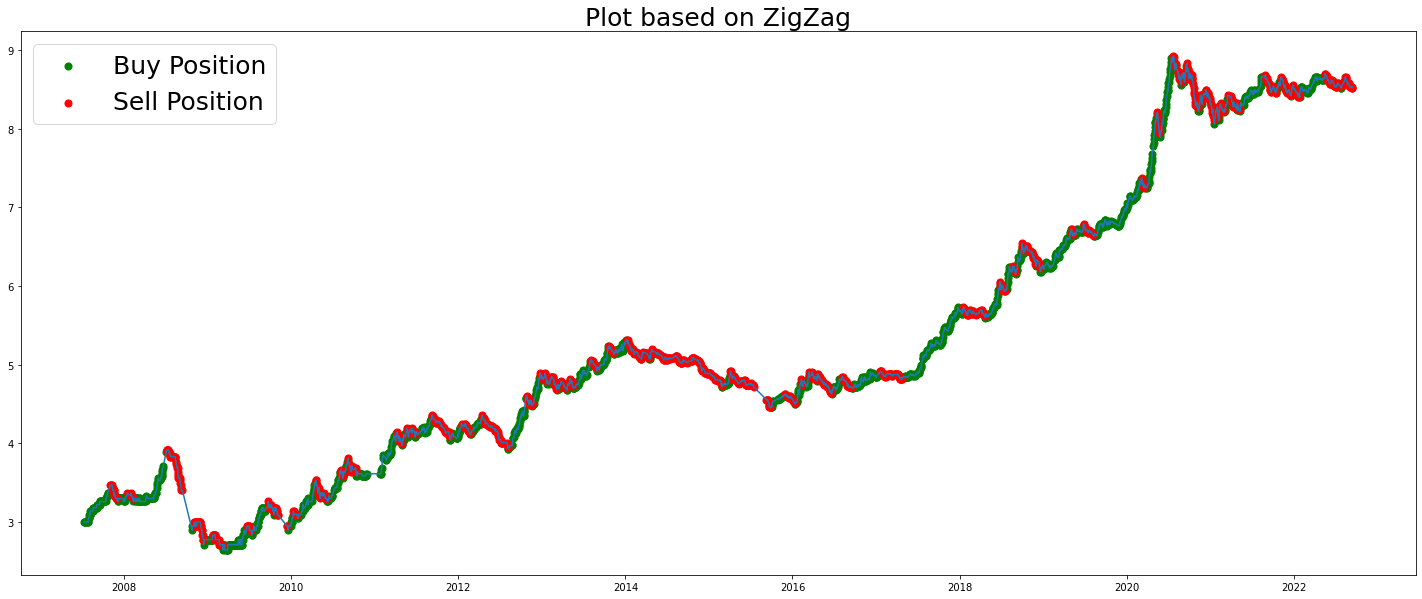

In [53]:
zeroSig = signals[-len(foladDf):] == 0
oneSig = signals[-len(foladDf):] == 1

plt.figure(figsize = (25, 10))
plt.title('Plot based on ZigZag', fontsize = 25)

plt.plot(
    foladDf['date'], 
    np.log(foladDf['adjClose'])
)

plt.scatter(
    foladDf['date'][np.squeeze(oneSig.values)],
    np.log(foladDf['adjClose'][np.squeeze(oneSig.values)]), 
    color = 'g',
    s = 50,
    label = 'Buy Position'
)

plt.scatter(
    foladDf['date'][np.squeeze(zeroSig.values)],
    np.log(foladDf['adjClose'][np.squeeze(zeroSig.values)]), 
    color = 'r',
    s = 50,
    label = 'Sell Position'
)
plt.legend(fontsize = 25)

# model

In [54]:
y = signals[-len(foladDf):]

X_train, X_test, y_train, y_test = train_test_split(
    foladDf.drop(columns = ['date']).values, 
    y, 
    shuffle = False, 
    random_state = 0)

In [55]:
from model import RFClf
trainPred, testPred, trainProb, testProb, featureImport, trainClassReport, testClassReport \
    = RFClf(X_train, y_train, X_test, y_test)

e:\Git\iran-stock-market\model.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_data, train_label)


In [56]:
print(f'Training classification report:\n{trainClassReport}')
print(f'Testing classification report:\n{testClassReport}')

Training classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1154
         1.0       1.00      1.00      1.00      1348

    accuracy                           1.00      2502
   macro avg       1.00      1.00      1.00      2502
weighted avg       1.00      1.00      1.00      2502

Testing classification report:
              precision    recall  f1-score   support

         0.0       0.46      0.88      0.61       322
         1.0       0.82      0.36      0.50       512

    accuracy                           0.56       834
   macro avg       0.64      0.62      0.55       834
weighted avg       0.68      0.56      0.54       834



In [57]:
Xdf_train = foladDf[:len(X_train)]
Xdf_test = foladDf[len(X_train):]
ydf_train = y[:len(X_train)]
ydf_test = y[len(X_train):]

zeroSig_test = ydf_test == 0
oneSig_test = ydf_test == 1

zeroSig_testPred = testPred == 0
oneSig_testPred = testPred == 1

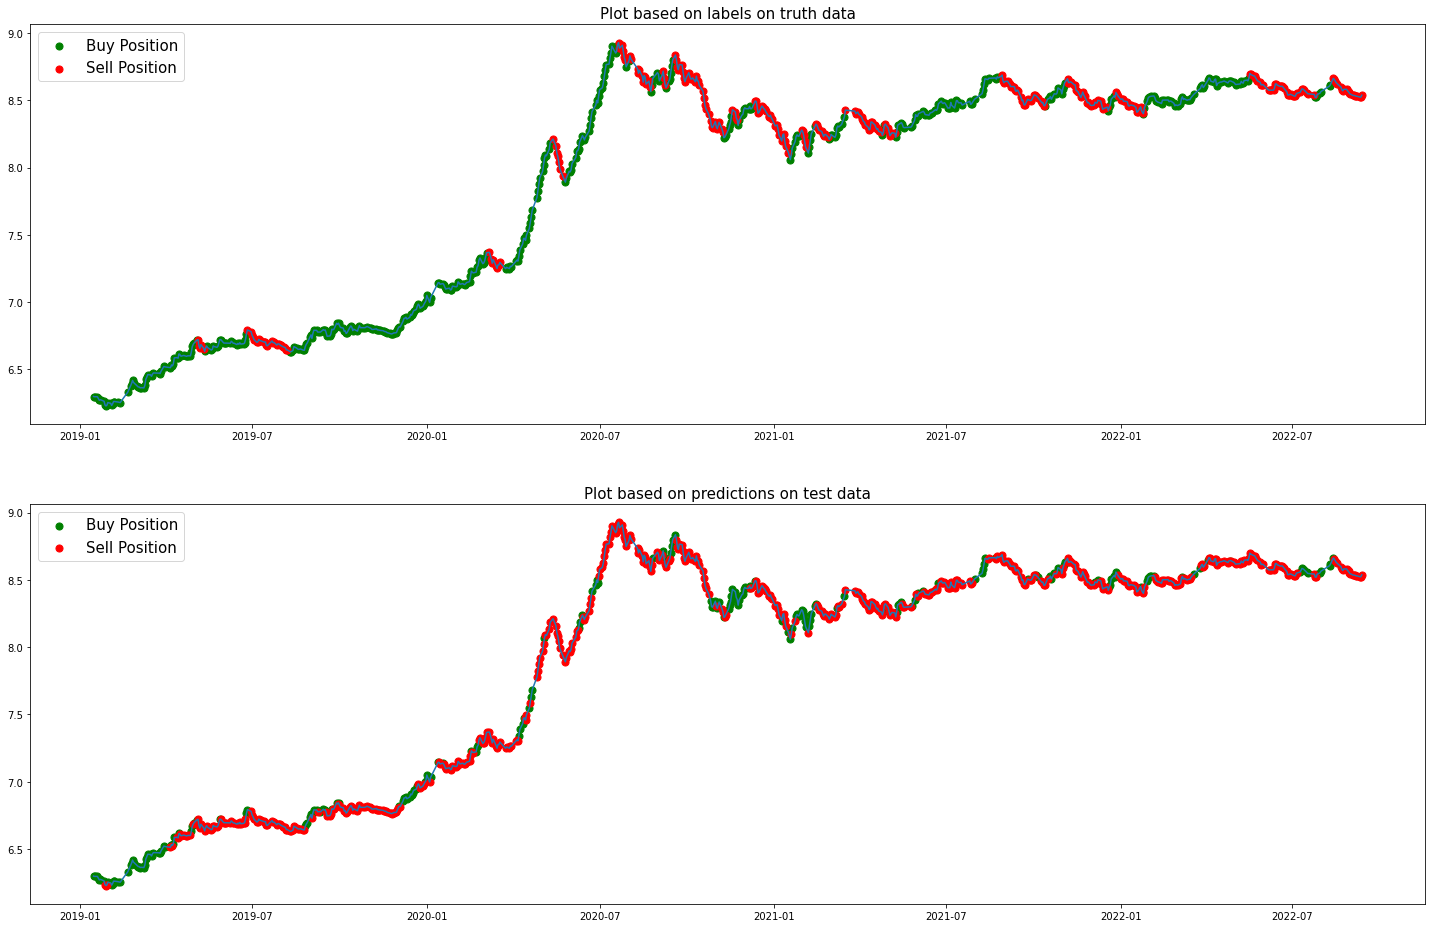

In [59]:
plt.figure(figsize = (25, 25))

plt.subplot(3, 1, 1)
plt.title('Plot based on labels on truth data', fontsize = 15)
plt.plot(
    Xdf_test['date'], 
    np.log(Xdf_test['adjClose'])
)
plt.scatter(
    Xdf_test['date'][np.squeeze(oneSig_test.values)],
    np.log(Xdf_test['adjClose'][np.squeeze(oneSig_test.values)]), 
    color = 'g',
    s = 50, 
    label = 'Buy Position'
)
plt.scatter(
    Xdf_test['date'][np.squeeze(zeroSig_test.values)],
    np.log(Xdf_test['adjClose'][np.squeeze(zeroSig_test.values)]), 
    color = 'r',
    s = 50,
    label = 'Sell Position'
)
plt.legend(fontsize = 15)

plt.subplot(3, 1, 2)
plt.title('Plot based on predictions on test data', fontsize = 15)

plt.plot(
    Xdf_test['date'], 
    np.log(Xdf_test['adjClose'])
)
plt.scatter(
    Xdf_test['date'][np.squeeze(oneSig_testPred)],
    np.log(Xdf_test['adjClose'][np.squeeze(oneSig_testPred)]), 
    color = 'g',
    s = 50, 
    label = 'Buy Position'
)
plt.scatter(
    Xdf_test['date'][np.squeeze(zeroSig_testPred)],
    np.log(Xdf_test['adjClose'][np.squeeze(zeroSig_testPred)]), 
    color = 'r',
    s = 50,
    label = 'Sell Position'
)
plt.legend(fontsize = 15)

# plt.subplot(3, 1, 3)
# plt.plot(
#     foladHist['date'], 
#     foladHist['pct_change'].cumsum(),
#     label = 'Ideal'
# )
# plt.plot(
#     foladHist['date'], 
#     (foladHist['pct_change'] * rsiCols['RSI_position']).cumsum(), 
#     label = 'Active investing based on model signals'
# )

# plt.legend(fontsize = 15)

<BarContainer object of 56 artists>

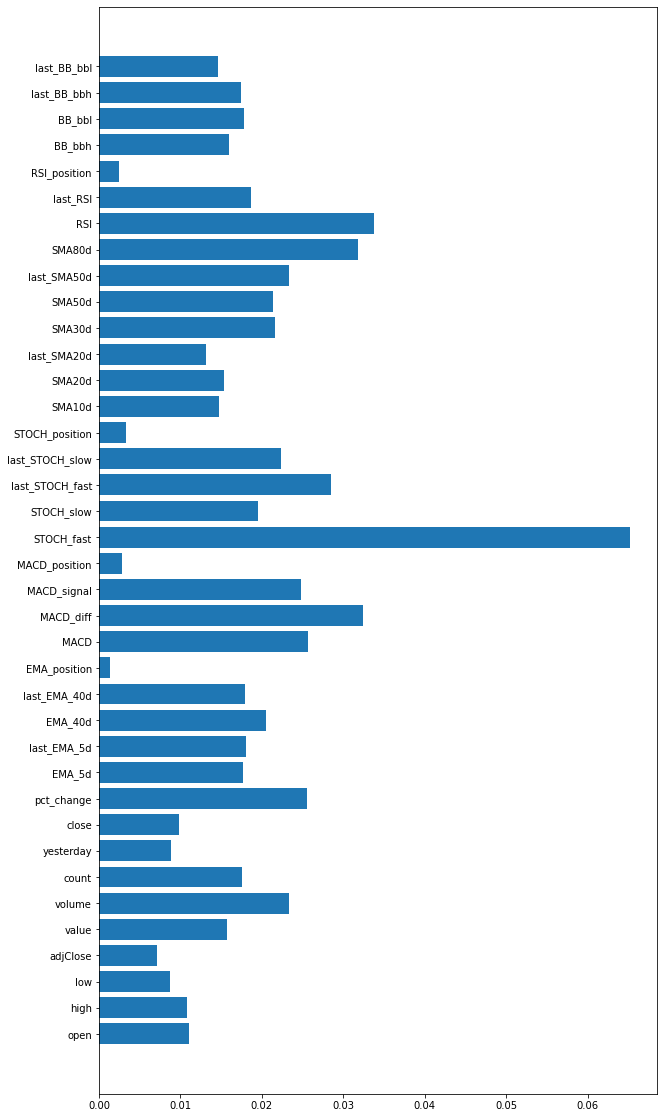

In [ ]:
plt.figure(figsize = (10, 20))
plt.barh(foladDf.drop(columns = ['date']).columns, featureImport)

# Data pre-processing

In [ ]:
# foladHist.insert(1,'step', np.arange(1, len(foladHist) + 1))
# foladHist = pd.merge(foladHist, marketIndex, how = 'left', on = 'date')

# cols = ['date', 'jdate', 'step', 'TEDPIX',
#         'open', 'close', 'high', 'low', 'adjClose', 
#         'value', 'volume', 'count', 'yesterday']
# foladHist = foladHist[cols]

# foladHist.head()

,date,jdate,step,TEDPIX,open,close,high,low,adjClose,value,volume,count,yesterday
0,2007-03-11,NaN,1,NaN,16.0,16.0,16.0,16.0,16.0,889437216900,468077431,7736,16.0
1,2007-03-12,NaN,2,NaN,16.0,16.0,16.0,16.0,16.0,193879458000,100041000,9214,16.0
2,2007-03-13,NaN,3,NaN,16.0,16.0,16.0,16.0,16.0,249241504527,126270939,5862,16.0
3,2007-03-14,NaN,4,NaN,16.0,16.0,16.0,16.0,16.0,51666379451,26705128,1901,16.0
4,2007-03-17,NaN,5,NaN,16.0,16.0,16.0,16.0,16.0,28239006789,14877283,1514,16.0


In [ ]:
# foladClient['date'] = pd.to_datetime(foladClient['date'])
# foladClient.iloc[:, 1: 13] = foladClient.iloc[:, 1: 13].astype('float')

# foladClient['Enter_individual_money'] = foladClient['individual_buy_value'] - foladClient['individual_sell_value']
# foladClient['Individual_buy_per_capita'] = foladClient['individual_buy_value'] / foladClient['individual_buy_count']
# foladClient['Individual_sell_per_capita'] = foladClient['individual_sell_value'] / foladClient['individual_sell_count']
# foladClient['Individual_buy_power_to_Individual_sell'] = foladClient['Individual_buy_per_capita'] / foladClient['Individual_sell_per_capita']

# foladClient.head()

,date,individual_buy_count,corporate_buy_count,individual_sell_count,corporate_sell_count,individual_buy_vol,corporate_buy_vol,individual_sell_vol,corporate_sell_vol,individual_buy_value,...,corporate_sell_value,individual_buy_mean_price,individual_sell_mean_price,corporate_buy_mean_price,corporate_sell_mean_price,individual_ownership_change,Enter_individual_money,Individual_buy_per_capita,Individual_sell_per_capita,Individual_buy_power_to_Individual_sell
0,2022-09-11,1371.0,7.0,867.0,13.0,27460629.0,10290000.0,20446098.0,17304531.0,1.381615e+11,...,8.705416e+10,5031.256319,5027.903180,5023.683188,5030.714905,7014531.0,3.536046e+10,1.007742e+08,1.185709e+08,0.849907
1,2022-09-10,1456.0,8.0,1076.0,13.0,29062906.0,21378562.0,27200089.0,23241379.0,1.462610e+11,...,1.168147e+11,5032.565812,5038.922073,5033.678077,5026.150004,1862817.0,9.201858e+09,1.004540e+08,1.273784e+08,0.788627
2,2022-09-07,1449.0,6.0,857.0,14.0,32216792.0,10367000.0,18179929.0,24403863.0,1.629032e+11,...,1.234246e+11,5056.469577,5053.187948,5053.341441,5057.585400,14036863.0,7.103663e+10,1.124246e+08,1.071956e+08,1.048780
3,2022-09-06,1433.0,6.0,925.0,8.0,20280964.0,14420554.0,23545245.0,11156273.0,1.026170e+11,...,5.649329e+10,5059.769572,5058.994246,5061.632671,5063.814127,-3264281.0,-1.649825e+10,7.160991e+07,1.287733e+08,0.556093
4,2022-09-05,2007.0,3.0,820.0,10.0,34964184.0,13711412.0,34007836.0,14667760.0,1.777995e+11,...,7.455167e+10,5085.189164,5082.124349,5074.913554,5082.689437,956348.0,4.967438e+09,8.858968e+07,2.107708e+08,0.420313


In [ ]:
# foladHist = pd.merge(foladHist, foladClient.iloc[:, [0, -4, -3, -2, -1]], how = 'left', on = 'date')
# foladHist.head()

,date,jdate,step,TEDPIX,open,close,high,low,adjClose,value,volume,count,yesterday,Enter_individual_money,Individual_buy_per_capita,Individual_sell_per_capita,Individual_buy_power_to_Individual_sell
0,2007-03-11,NaN,1,NaN,16.0,16.0,16.0,16.0,16.0,889437216900,468077431,7736,16.0,NaN,NaN,NaN,NaN
1,2007-03-12,NaN,2,NaN,16.0,16.0,16.0,16.0,16.0,193879458000,100041000,9214,16.0,NaN,NaN,NaN,NaN
2,2007-03-13,NaN,3,NaN,16.0,16.0,16.0,16.0,16.0,249241504527,126270939,5862,16.0,NaN,NaN,NaN,NaN
3,2007-03-14,NaN,4,NaN,16.0,16.0,16.0,16.0,16.0,51666379451,26705128,1901,16.0,NaN,NaN,NaN,NaN
4,2007-03-17,NaN,5,NaN,16.0,16.0,16.0,16.0,16.0,28239006789,14877283,1514,16.0,NaN,NaN,NaN,NaN


In [ ]:
# foladHist['jdate'] = foladHist['date'].jalali.to_jalali()

# foladHist['year'] = foladHist['jdate'].jalali.year
# foladHist['month'] = foladHist['jdate'].jalali.month
# foladHist['quarter'] = foladHist['jdate'].jalali.quarter
# foladHist['day'] = foladHist['jdate'].jalali.day
# foladHist['weekday'] = foladHist['jdate'].jalali.weekday

# foladHist

,date,jdate,step,TEDPIX,open,close,high,low,adjClose,value,...,yesterday,Enter_individual_money,Individual_buy_per_capita,Individual_sell_per_capita,Individual_buy_power_to_Individual_sell,year,month,quarter,day,weekday
0,2007-03-11,1385-12-20 00:00:00,1,NaN,16.0,16.0,16.0,16.0,16.0,889437216900,...,16.0,NaN,NaN,NaN,NaN,1385,12,4,20,1
1,2007-03-12,1385-12-21 00:00:00,2,NaN,16.0,16.0,16.0,16.0,16.0,193879458000,...,16.0,NaN,NaN,NaN,NaN,1385,12,4,21,2
2,2007-03-13,1385-12-22 00:00:00,3,NaN,16.0,16.0,16.0,16.0,16.0,249241504527,...,16.0,NaN,NaN,NaN,NaN,1385,12,4,22,3
3,2007-03-14,1385-12-23 00:00:00,4,NaN,16.0,16.0,16.0,16.0,16.0,51666379451,...,16.0,NaN,NaN,NaN,NaN,1385,12,4,23,4
4,2007-03-17,1385-12-26 00:00:00,5,NaN,16.0,16.0,16.0,16.0,16.0,28239006789,...,16.0,NaN,NaN,NaN,NaN,1385,12,4,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,2022-09-06,1401-06-15 00:00:00,3411,1420834.1,5080.0,5070.0,5100.0,5020.0,5060.0,175608551800,...,5080.0,-1.649825e+10,7.160991e+07,1.287733e+08,0.556093,1401,6,2,15,3
3411,2022-09-07,1401-06-16 00:00:00,3412,1412856.5,5080.0,5040.0,5090.0,5020.0,5060.0,215291219330,...,5060.0,7.103663e+10,1.124246e+08,1.071956e+08,1.048780,1401,6,2,16,4
3412,2022-09-10,1401-06-19 00:00:00,3413,1397434.5,5050.0,5040.0,5070.0,4990.0,5030.0,253873785990,...,5060.0,9.201858e+09,1.004540e+08,1.273784e+08,0.788627,1401,6,2,19,0
3413,2022-09-11,1401-06-20 00:00:00,3414,1390732.4,5040.0,5030.0,5060.0,5020.0,5030.0,189855163190,...,5030.0,3.536046e+10,1.007742e+08,1.185709e+08,0.849907,1401,6,2,20,1


# Candel Plot

In [ ]:
# fig = make_subplots(
#     rows = 2, 
#     cols = 1, 
#     shared_xaxes = True, 
#     vertical_spacing = 0.03, 
#     subplot_titles = ('OHLC', 'Volume'), 
#     row_width = [0.2, 0.7]
# )

# fig.add_trace(
#     go.Candlestick(
#         x = foladHist['date'],
#         open = foladHist['open'],
#         high = foladHist['high'],
#         low = foladHist['low'],
#         close = foladHist['adjClose']
#     ),
#     row = 1, col = 1
# )

# fig.add_trace(
#     go.Bar(
#         x = foladHist['date'],
#         y = foladHist['volume'], 
#         showlegend = False
#         ),
#         row = 2, col = 1
# )
# fig.update(layout_xaxis_rangeslider_visible = False)
# fig.show()

NameError: name 'make_subplots' is not defined